# IEOR 4703 -- Monte Carlo Simulation for FE

## (European) option pricing via Finite Differences

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from BMS import BMS_price
from time import time

## Tridiagonal solver

In [ ]:
def tridiag_solver(l, d, u, b):
    n = len(b)
    D = np.copy(d)
    B = np.copy(b)
    x = np.zeros(n)
    for i in range(1, n):
        w = l[i] / D[i-1]
        D[i] = D[i] - w*u[i-1]
        B[i] = B[i] - w*B[i-1]
    x[n-1] = B[n-1]/D[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (B[i] - u[i]*x[i+1])/D[i]
    return x

In [ ]:
st = time()

# pick 1 or 2
scenario = 1

if scenario == 1:
    r = 0.05
    q = 0.01
elif scenario == 2:
    r = 0.01
    q = 0.10

S = 100
K = 80
sig = 0.3
T = 1

# 0,1,2,...,N,N+1

# hyperparamters
sMin = 10
sMax = 410

N = 4000
M = 365

dS = (sMax - sMin)/N
dT = T/M

s = np.zeros(N-1)
tau = np.zeros(M)

l = np.zeros(N-1)
u = np.zeros(N-1)
d = np.zeros(N-1)

vCall = np.zeros(N-1)
vPut = np.zeros(N-1)

alpha = 0.5*sig**2*dT/dS**2
beta = (r - q)*dT/(2.0*dS)

for i1 in range(N-1):

    s[i1] = sMin + (i1 + 1)*dS
    if i1 == 0:
        d[i1]= 1 + r*dT + 2*beta*s[i1]
        u[i1] = -2*beta*s[i1]
    elif i1 == N-2:
        l[i1] =  2*beta*s[i1]
        d[i1] = 1 + r*dT - 2*beta*s[i1]
    else:
        l[i1] = -alpha*s[i1]**2 + beta*s[i1]
        d[i1] = 1 + r*dT + 2*alpha*s[i1]**2
        u[i1] = -alpha*s[i1]**2 - beta*s[i1]

    vCall[i1] = np.maximum(s[i1] - K, 0)
    vPut[i1]  = np.maximum(K - s[i1], 0)

for j1 in range(M):
    vCall = tridiag_solver(l, d, u, vCall)
    vPut  = tridiag_solver(l, d, u, vPut)

et = time()
print('Elapsed time was %f seconds' % (et-st))



Elapsed time was 7.103937 seconds


### Option prices

In [ ]:
call_European = BMS_price('call', S, K, r, q, sig, T)
put_European = BMS_price('put', S, K, r, q, sig, T)

call_FD = np.interp(S, s, vCall)
put_FD  = np.interp(S, s, vPut)

print('European call (exact) = %f' % call_European)
print('European call (FD method) = %f' % call_FD)
print('European put (exact) = %f' % put_European)
print('European put (FD method) = %f' % put_FD)

European call (exact) = 25.614621
European call (FD method) = 25.612581
European put (exact) = 2.707992
European put (FD method) = 2.706199


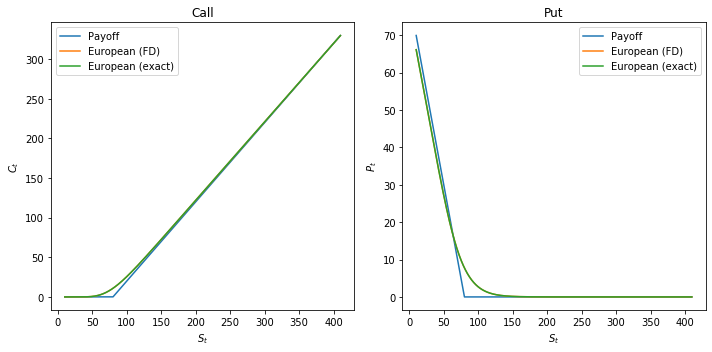

In [ ]:
eCall = BMS_price('call', s, K, r, q, sig, T)
ePut = BMS_price('put', s, K, r, q, sig, T)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(s, np.maximum(s - K,0))
plt.plot(s, vCall)
plt.plot(s, eCall);
plt.xlabel('$S_t$')
plt.ylabel('$C_t$')
plt.title('Call')
plt.legend(['Payoff', 'European (FD)', 'European (exact)'])
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.plot(s, np.maximum(K - s,0))
plt.plot(s, vPut)
plt.plot(s, ePut);
plt.xlabel('$S_t$')
plt.ylabel('$P_t$')
plt.title('Put')
plt.legend(['Payoff', 'European (FD)', 'European (exact)'])
plt.tight_layout()

plt.show()